---
title: "Statistics Using Julia"
author: 
  - name: "Sujit Sandipan Chaugule"
    affiliation: "Department of Pharmaceutical Sciences and Technology, Institute of Chemical Technology, Mumbai"
    url: "https://sites.google.com/view/statsphere"
---


# Random Variables

<div style="text-align: justify;">

A random variable is a quantity whose possible values are outcomes of a random phenomenon. It is a fundamental concept in probability and statistics. A random variable can be classified in two types:

1.  **Discrete random variable:** A Discrete random variable can take a random values which are finite or countably infinite. Examples of discrete random variables are:

- The number of heads observed when flipping a coin three times (possible values: 0, 1, 2, or 3).

- The result of rolling a six-sided die (possible values: 1 to 6).

- The number of rainy days in a week.

- Whether tomorrow will be sunny or rainy (can be encoded as: sunny = 1, rainy = 0).

2.  **Continuous random variable:** A continuous random variable can take an infinite number of values within a given continuous range. Examples of continuous random variables are:

- The amount of rainfall in Mumbai tomorrow, measured in millimeters.

- The temperature in Mumbai at noon tomorrow.

- The concentration of a pollutant in the air at a given location and time.

</div>

# Probability Distributions

 <div style="text-align: justify;">
 
 A probability distribution is a mathematical function that describes the likelihood of different outcomes of random variable. Based on the types of random variable as mentioned above, probability distributions are classified into two main categories:

 </div>

## Probability Mass Function (PMF)

<div style="text-align: justify;">

The PMF is used for discrete random variables and gives the probability that the random variable $X$ takes on a specific value $x$. Mathematically, the PMF is defines as: 
$$
P(X = x) = f(x), \quad \text{where } \sum_{x} f(x) = 1.
$$

For example, if $X$ represents the number of successful breeding attempts by a pair of birds in a season, the PMF $f(x)$ tells us the probability of observing exactly $x$ successful attempts.
</div>

## Probability Densuty Function (PDF)

<div style="text-align: justify;">

The PDF is used for continuous random variables and describes the likelihood of the random variable $X$ taking a value in a specific range. Unlikke the PMF, the PDF does not gives the probability of $X$ taking a specific value, as the probability of any single point in a continuous distribution is zero. Instead, probabilities are computed over intervals. The PDF $f(x)$ satisfies: 

$$
P(a \le X \le b) = \int_a^b f(x)\,dx, 
\quad \text{where } \int_{-\infty}^{\infty} f(x)\,dx = 1.
$$


For example, if $X$ represents the height of trees in a forest, the PDF $f(x)$ allows un to calculate the probability that a tree height lies within a given range, say between 10 and 15 meters.

</div>

# Exploring probability distributions with `Julia`

<div style="text-align: justify;">


Julia provides a comprehensive and efficient framework for working with probability distributions through the `Distributions.jl` package, making it an essential tool for data scientists and statisticians. In Julia, probability distributions are first constructed using distribution constructors like `Normal(μ, σ)`, `Poisson(λ)`, or `Beta(α, β)`, depending on whether the distribution is continuous or discrete. Once a distribution object is created, a suite of functions can be applied to it: `pdf` is used to compute the probability density or mass function, `cdf` returns the cumulative distribution function, `quantile` computes the quantile (inverse CDF), and `rand` is used for generating random samples. This object-oriented design allows for clear, modular code and supports a wide variety of statistical tasks. Whether modeling uncertainty, performing simulations, or conducting inference, Julia’s consistent and expressive distribution framework is well-suited to both theoretical and applied statistical computing.

</div>

<div style="text-align: justify;">

-   `pdf`: **Probability Density or Mass Function**

    This function computes the probability mass function (PMF) for discrete distributions or the probability density function (PDF) for continuous distributions. It provides information about the likelihood of specific outcomes in a distribution. In Julia, use `pdf(d, x)`, where `d` is the distribution object and `x` is the value at which the probability is to be evaluated.

-   `cdf`: **Cumulative Distribution Function**

    The `cdf` function calculates the cumulative probability, which gives the probability of a random variable taking a value less than or equal to a specific threshold. This is useful for determining the probability over a range of values. Use `cdf(d, x)` to compute this in Julia.

-   `quantile`: **Quantile Function**

    The `quantile` function determines the threshold value (quantile) for a given cumulative probability. It allows us to identify key points in the distribution, such as percentiles and confidence limits. In Julia, this is used as `quantile(d, p)`, where `p` is the probability.

-   `rand`: **Random Number Generation**

    The `rand` function generates random samples from a specified distribution, making it a powerful tool for simulating data and performing Monte Carlo experiments. You can use `rand(d, n)` to generate `n` random values from distribution `d`.

Together, these functions enable a wide range of statistical operations—from evaluating pointwise probabilities and cumulative probabilities to simulating data and identifying thresholds. In the following sections, we will explore each of these operations in detail and demonstrate how they apply to various probability distributions.


</div>

## Discrete Distributions

### Bernoulli Distribution

<div style="text-align: justify;">


Suppose we are studying the migration behavior of a species of butterfly. For each butterfly observed, there is a 40% chance that it migrates to a particular location. We want to model whether a single butterfly migrates or not.

The Bernoulli distribution is one of the simplest discrete probability distributions. It models a random experiment that has exactly two possible outcomes, commonly referred to as "success" (the migration of a butterfly to the target location) and "failure" (not migrating).

A Bernoulli distribution is defined by:

-   $p$: the probability of success.
-   The PMF of the Bernoulli distribution is:

$$
\mathbb{P}(X = k \mid p) = 
\begin{cases}
p       & \text{if } k = 1 \\
1 - p   & \text{if } k = 0
\end{cases}
\quad \text{where } 0 \leq p \leq 1
\tag{3}
$$


where $k$ is the outcome of the experiment, 1 for success and 0 for failure.

The Bernoulli distribution is the building block for the Binomial Distribution, which models the number of successes in multiple independent Bernoulli trials.

In Julia, the Bernoulli distribution is implemented directly through the `Distributions.jl` package. The equivalent functions for working with probability distributions are:

1.  `pdf(Bernoulli(p), k)`: Computes the probability mass function (PMF) from `Distributions.jl`.

2.  `cdf(Bernoulli(p), k)`: Computes the cumulative distribution function (CDF) from `Distributions.jl`.

3.  `quantile(Bernoulli(p), q)`: Computes the quantile function (inverse of the CDF) from `Distributions.jl`.

4.  `rand(Bernoulli(p), n)`: Simulates `n` random outcomes , `rand()` is from Base Julia.

These functions provide a powerful and consistent interface for working with discrete probability models like the Bernoulli distribution in Julia.


</div>

 <div style="text-align: justify;">
 
 
 > ℹ️ **Note**  
> To better understand how these functions work in Julia, you can use the built-in help system. For instance, typing ?pdf in the REPL will show the usage and arguments for the `pdf()` function. Similarly, you can explore `?cdf`, `?quantile`, and `?rand` to learn more about each function. These functions `pdf()`, `cdf()` and, `quantile ()` all part of the `Distributions.jl` package, which provides tools for working with probability distributions in Julia.

</div>

<div style="text-align: justify;">

For the above butterfly migration example, suppose $p = 0.4$,the probability of a butterfly migrating. The probability of success ($k=1$) or failure ($k=0$) can be calculated as:

</div>

In [2]:
using Distributions # load the package

In [3]:
pdf(Bernoulli(0.4), 1) # probability of sucess

0.4

In [4]:
pdf(Bernoulli(0.6), 1) # probability of sucess

0.6

The cumulative probability $P(X \le k)$ can be calculated as:

$$
P(X \le k) = \sum_{x \le k} f(x).
$$

In [5]:
cdf(Bernoulli(0.4),0) # P(X<=0)

0.6

In [6]:
cdf(Bernoulli(0.4),1) # P(X<=1)

1.0

The outcome corresponding to a given cumulative probability can be caculated as:

In [7]:
quantile(Bernoulli(0.4), 0.6)  # Finds the smallest k with P(X ≤ k) ≥ 0.6

0.0

The 10 Bernoulli trials can be simulated as follows:

In [8]:
rand(Bernoulli(0.4), 10)

10-element Vector{Bool}:
 1
 1
 0
 0
 0
 0
 0
 0
 1
 1

### Binomial Distribution

<div style="text-align: justify;">


Consider an ecological study on a rare plant species. Researchers are observing 10 specific locations to see if the plant is present or absent. Each observation can result in success (plant present) or failure (plant absent), with the probability of success being 0.3.

This scenario involves repeated independent trials with two outcomes (success or failure). The random variable $X$ represents the number of successes in the 10 trials. This is a classic case for the **binomial Distribution**.

The binomial distribution describes the probability of $k$ successes in $n$ independent Bernoulli trials with success probability $p$. The PMF is:

$$
P(X = k \mid p) = {n \choose k} p^k (1-p)^{n-k}, 
\quad k = 0,1,\ldots,n, \; 0 \le p \le 1. \tag{4}
$$


The binomial distribution extends the Bernoulli distribution to $n$ independent trials. Using the functions `pdf()`, `cdf()`, and `quantile()` from the `Distributions.jl` package, and `rand()` from Base Julia, we can analyze binomial outcomes in Julia. 

The `pdf()` function calculates the probability of observing a specific number of successes in a fixed number of trials. The `cdf()` function returns the cumulative probability of obtaining up to a certain number of successes. The `quantile()` function provides the smallest number of successes such that the cumulative probability reaches or exceeds a given threshold. Finally, the `rand()` function allows us to generate random samples from a binomial distribution.

These functions together offer a powerful and flexible way to work with binomial data in Julia.


For the example of an ecological study on a rare plant species, $n=10$ and $p=0.3$, representing the probability that a rare plant is found at a given location. The probability of observing exactly $k$ successes can be calculated as:


</div>

In [9]:
using Distributions

In [10]:
pdf(Binomial(10, 0.3), 3)  # Probability of observing 3 successes

0.2668279320000006

To compute the cumulative probability $P(X \le k)$, use:

$$
P(X \le k) = \sum_{x=0}^{k} {n \choose x} p^x (1-p)^{n-x}.
$$


In [11]:
cdf(Binomial(10, 0.3), 3) # Probability of at most 3 successes

0.6496107184000002

To find the number of successes corresponding to a cumulative probability, use

In [12]:
quantile(Binomial(10, 0.3), 0.7)  # # Smallest k with P(X ≤ k) ≥ 0.7

4

Simulate outcomes for  trials using:

In [13]:
rand(Binomial(10, 0.3), 5)

5-element Vector{Int64}:
 3
 6
 4
 3
 1

In [14]:
using Plots
using Distributions
using LaTeXStrings

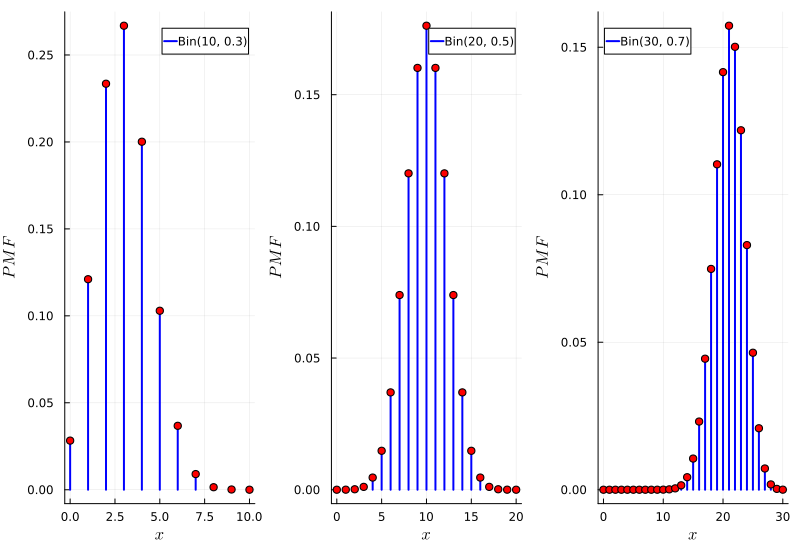

In [15]:
n_vals = [10, 20, 30]
p_vals = [0.3, 0.5, 0.7]

plt = plot(layout = (1, 3), size = (800, 550))

for i in eachindex(n_vals) 
    n = n_vals[i]
    p = p_vals[i]
    x = 0:n
    y = pdf(Binomial(n, p), x)
    plot!(plt[i], x, y, color = "blue", seriestype = :stem, lw = 2, 
        xlabel = L"x", ylabel = L"PMF", label = "Bin($n, $p)")
    scatter!(plt[i], x, y, color = "red", label = "")
end

display(plt)

### Poisson distribution

<div style="text-align: justify;">


The Poisson distribution models the number of events occurring within a fixed interval of time or space, given the average rate ($\lambda$) of occurrence. It is often used for rare events that occur independently and infrequently, such as bird sightings, traffic accidents, or customer arrivals.

Consider a study on the number of rare bird sightings per year in a remote national park. If the sightings are infrequent and occur independently of each other, the number of sightings over a fixed time period can be modeled using the Poisson distribution.

The Poisson distribution is defined by a single parameter, $\lambda$- the average rate of events per unit time or space. The PMF is:

$$
P(X = k \mid \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}, 
\quad k = 0,1,\ldots,\; 0 < \lambda < \infty. \tag{5}
$$


where $k$ is the number of events (sightings in our example) we are interested in.

In `Julia`, the Poisson distribution is supported through a set of functions similar to those for Bernoulli and Binomial. Let us consider a study on rare bird sightings in a remote national park, where the average number of sightings per year is $\lambda = 3$. Here is how the Poisson distribution can be used in Julia:

To compute the probability of observing exactly $k$ bird sightings in a year:


</div>

In [16]:
using Distributions

In [17]:
pdf(Poisson(3), 2)  # Probability of observing 2 sightings

0.22404180765538775

In [18]:
pdf(Poisson(3), 5)  # # Probability of observing 5 sightings

0.10081881344492458

<div style="text-align: justify;">

To compute the cumulative probability $P(X \le k)$, representing the probability of observing up to $k$ sightings, we use:

$$
P(X \le k) = \sum_{x=0}^{k} \frac{\lambda^x e^{-\lambda}}{x!}.
$$


</div>

In [19]:
cdf(Poisson(3), 2) # Probability of observing at most 2 sightings

0.42319008112684353

In [20]:
cdf(Poisson(3), 5) # Probability of observing at most 5 sighti

0.9160820579686966

To determine the number of sightings corresponding to a given cumulative probability:

In [21]:
quantile(Poisson(3), 0.8)  # Smallest k with P(X ≤ k) ≥ 0.8

4

To simulate bird sightings over multiple years:

In [22]:
rand(Poisson(3), 10)  # Simulates the number of sightings for 10 years

10-element Vector{Int64}:
 6
 4
 6
 4
 4
 2
 4
 2
 3
 3

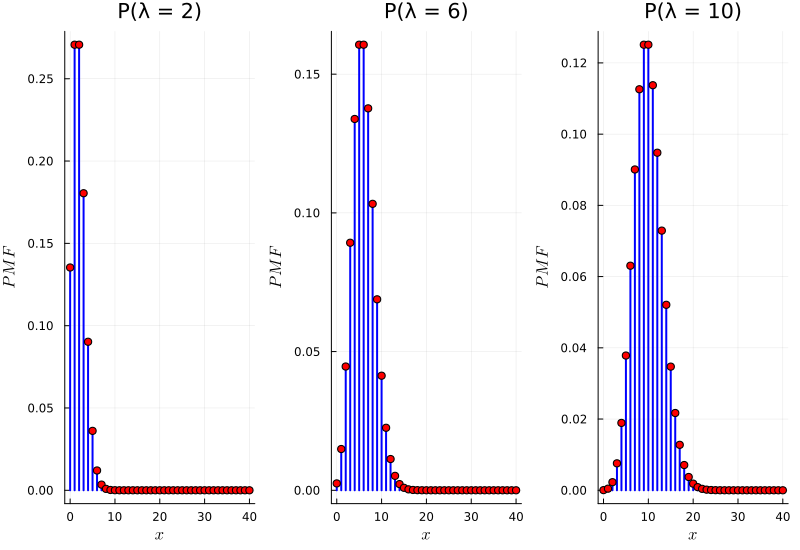

In [23]:
λ_vals = [2, 6, 10]
n = 40
plt = plot(layout = (1, 3), size = (800, 550))
for i in eachindex(λ_vals) 
    λ = λ_vals[i]
    x = 0:n
    y = pdf(Poisson(λ), x)
    plot!(plt[i], x, y, color = "blue", seriestype = :stem, lw = 2, 
        xlabel = L"x", ylabel = L"PMF", title = "P(λ = $λ)", label = "")
    scatter!(plt[i], x, y, color = "red", label = "")
end
display(plt)

## Continuous Distributions

### Uniform Distributions

<div style="text-align: justify;">

The continuous uniform distribution describes a situation where all outcomes in a given interval are equally likely. It is commonly used when there is no preference for an specific value within a defined range.

Consider a scenario where a factory produces metal rods, and the lengths of the rods are uniformly distributed between 10 and 20 centimeters. A quality control engineer wants to determine the probability that a randomly selected rod has a length between 12 and 15 centimeters.

This situation is modeled b the continuous uniform distribution because all rod lengths within the interval are equally likel.

The PDF is:

$$f(x|a,b) = \begin{cases} \frac{1}{b-a},~~ a\leq x \leq b,\\
0,~~~~~\text{otherwise}
\end{cases} \tag{10}$$ 
where $a$ and $b$ represent the lower and upper bounds of the distribution, respectively, and $x$ is a value within this interval.

Julia provides the following built-in functions to work with the Uniform Distribution:

1.  `pdf()` – Computes the probability density function (PDF) from `Distributions.jl`.

2.  `cdf()` – Computes the cumulative distribution function (CDF) from `Distributions.jl`.

3.  `quantile()` – Computes the quantile function (inverse of CDF) from `Distributions.jl`.

4.  `rand()` – Simulates random outcomes from a uniform distribution from Base Julia.

These functions offer a consistent and efficient interface for analyzing uniform distributions in Julia.


Let us understand the utility of these functions by considering same above example of production of metal rods.

</div>

In [24]:
using Distributions

In [25]:
# the lengths of the rods are uniformly distributed between 10 and 20 centimeters
a = 10
b = 20

20

The PDF at a specific point, say 12 cm is:

In [26]:
pdf(Uniform(a,b), 12)

0.1

The probability that a rod is between 12 and 15 cm is:

In [27]:
cdf(Uniform(a,b), 15) - cdf(Uniform(a,b), 12)

0.3

The length below which 80% of rods fall (80th percentile) is:

In [28]:
quantile(Uniform(a,b), 0.8)

18.0

To generate 5 random rod lengths:

In [29]:
rand(Uniform(a,b), 5)

5-element Vector{Float64}:
 16.984724423684426
 13.896667218756209
 16.83085050409904
 16.750197239510626
 15.644032998469637

### Normal Distribution

<div style="text-align: justify;">

The normal distribution, also known as the Gaussian distribution, is one of the most widely used probability distributions in statistics. It models continuous data that tend to cluster around a central mean, with a symmetrical bell-shaped curve. If the random variable $X$ is following the normal distribution with mean $\mu$ and variance $\sigma^2$ then it can be mathematically written as $X\sim \mathcal{N}(\mu, \sigma^2)$. The normal distribution curve for standard normal distribution (i.e. $\mathcal{N}(0, 1)$) is as follows:

</div>

In [30]:
using Distributions, Plots, LaTeXStrings

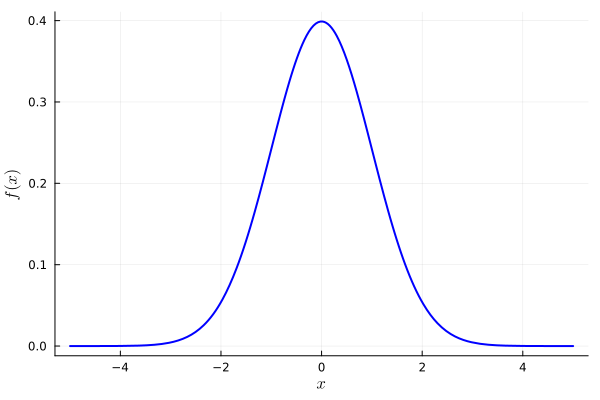

In [31]:
plot(x->pdf(Normal(0,1),x), color = "blue", xlabel = L"x", ylabel = L"f(x)", 
    lw = 2, label = "")

<div style="text-align: justify;">


**Example:** Suppose the diameters of bolts manufactured by a machine follow a normal distribution with a mean of 5 mm and a standard deviation of 0.2 mm. A quality control analyst wants to calculate the probability that a randomly selected bolt has a diameter between 4.8 mm and 5.2 mm. Since the variation in diameters is due to random factors and most values are expected to be close to the mean, the normal distribution is appropriate for modeling this scenario.

The PDF is:
$$
f(x \mid \mu, \sigma^2) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right), \quad -\infty < x < \infty,\ \mu \in \mathbb{R},\ \sigma > 0,\tag{11}$$

where $\mu$ is mean and $\sigma$ is the standard deviation (spread).

Julia provides the following built-in functions to work with the Normal Distribution:

1.  `pdf()` – Computes the probability density function (PDF) from `Distributions.jl`.

2.  `cdf()` – Computes the cumulative distribution function (CDF) from `Distributions.jl`.

3.  `quantile()` – Computes the quantile function (inverse of CDF) from `Distributions.jl`.

4.  `rand()` – Simulates random outcomes from a normal distribution from Base Julia.

Let us understand them one by one for the above mentioned example.


</div>

In [32]:
μ = 5  # mean is 5 mm
σ = 0.2 # standard deviation is 0.2 mm

0.2

To calculate the PDF value at $x=5$:

In [33]:
pdf(Normal(μ, σ), 5)

1.9947114020071635

Probability that a bolt has a diameter less than 5.2 mm:

In [34]:
cdf(Normal(μ, σ), 5.2)

0.8413447460685433

Probability that the diameter is between 4.8 mm and 5.2 mm:

In [35]:
cdf(Normal(μ, σ), 5.2) - cdf(Normal(μ, σ), 4.8)

0.6826894921370865

The $90^{\text{th}}$ percentile of bolt diameters:

In [36]:
quantile(Normal(μ, σ), 0.9)  

5.25631031310892

Generate 10 random diameter values from this normal distribution:

In [37]:
rand(Normal(μ, σ), 10)  

10-element Vector{Float64}:
 5.089957089065734
 4.884205127972849
 5.1450967455206635
 4.9457982851344875
 4.588369289283445
 4.717685689244872
 4.837842436218388
 5.017974413820845
 5.127607805804701
 4.978329789806991

### Exponential Distribution

<div style="text-align: justify;">


The exponential distribution describes the time between events that happen randomly but at a steady average rate. It’s often used in situations like waiting times. For example, the time you wait for the next bus, phone call, or customer to arrive.

It is memoryless, meaning the probability of an event occurring in the future is independent of the past. For example, if you are waiting for a bus and have already waited 5 minutes, the chance it arrives in the next 2 minutes is still the same as if you had just started waiting.


The PDF is:
$$
f(x \mid \lambda) = 
\begin{cases}
\lambda e^{-\lambda x}, & x \geq 0 \\
0, & x < 0
\end{cases}; \lambda>0
\tag{12}$$

where $\lambda > 0$ is the rate parameter (the reciprocal of the mean), and $x$ represents the time until the next event.

</div>

<div style="text-align: justify;">

Julia provides the following built-in functions to work with the Exponential Distribution:

1.  `pdf()` – Computes the probability density function (PDF) from `Distributions.jl`.

2.  `cdf()` – Computes the cumulative distribution function (CDF) from `Distributions.jl`.

3.  `quantile()` – Computes the quantile function (inverse of CDF) from `Distributions.jl`.

4.  `rand()` – Simulates random outcomes from an exponential distribution from Base Julia.

Let us understand them for the following examples.


**Example:** Suppose that in a certain desert region, it rains once every 10 days on average. We want to analyze how long it will take until the next rain.

</div>

In [38]:
using Distributions

In [39]:
λ = 1 / 10  # Since the average time between rains is 10 days

0.1

The probability density that it rains exactly after 5 days:

In [40]:
pdf(Exponential(1/λ), 5)

0.06065306597126335

The probability that it rains within the next 7 days:

In [41]:
cdf(Exponential(1/λ), 7)

0.5034146962085905

After how many days is there an 80% chance that it has rained?

In [42]:
quantile(Exponential(1/λ), 0.8)

16.094379124341003

Simulate waiting times (in days) for the next 5 rainfalls:

In [43]:
rand(Exponential(1/λ), 5)

5-element Vector{Float64}:
  3.9102867149804728
 34.66238942965015
  3.1060502665726815
  8.618498261363307
  2.3817588405334016

### Gamma Distribution

<div style="text-align: justify;">

The Gamma distribution is often used to model the amount of time or quantity needed for several events to occur, especially when these events happen at a steady average rate (in a Poisson process). It is useful when we want to understand how long it takes for something to accumulate like rainfall, sunlight, or nutrient intake, and is especially helpful in environmental and ecological studies where such quantities are naturally skewed (not symmetric).

As an example, in hydrology or ecology, we might want to know how much rainfall is expected before a plant blooms, or how long until a river reaches a certain flow level. These are examples where the Gamma distribution applies.

The PDF is:
$$
f(x \mid \alpha, \beta) = 
\begin{cases}
\displaystyle \frac{\beta^\alpha x^{\alpha - 1} e^{-\beta x}}{\Gamma(\alpha)}, & x \geq 0,\ \alpha > 0,\ \beta > 0 \\
0, & \text{otherwise}
\end{cases}
\tag{13}$$

where

The Gamma distribution can also be expressed using the *rate* parameter $\lambda$ (with $\lambda = \beta$):

 


- $\alpha > 0$ is the **shape parameter**,
- $\beta > 0$ is the **rate parameter**,
- $\Gamma(\alpha)$ is the **Gamma function**, defined as:

$$
\Gamma(\alpha) = \int_0^\infty t^{\alpha - 1} e^{-t} \, dt  \tag{14}
$$

For positive integers $n$, the Gamma function satisfies $\Gamma(n) = (n - 1)!$

</div>

<div style="text-align: justify;">

**Example:** Suppose an ecologist is studying a plant species that requires a cumulative rainfall of at least 30 mm before sprouting. Based on past data, the ecologist assumes that rainfall per storm follows a Gamma distribution with shape parameter $\alpha = 6$ and rate parameter $\beta = 0.2$ (mean rainfall per storm is $\frac{\alpha}{\beta} = 30$mm).

</div>

In [44]:
using Distributions, Plots

In [45]:
α = 6
β = 0.2

0.2

Probability Density at a Specific Rainfall, say at 20mm

In [46]:
pdf(Gamma(α, 1/β), 20)

0.03125869037010633

Cumulative Probability for Rainfall Up to 30 mm:

In [47]:
cdf(Gamma(α, 1/β), 30)

0.5543203586353888

To find the rainfall value corresponding to the $90^{\text{th}}$ percentile, we compute the empirical quantile at probability $p = 0.9$.


In [48]:
quantile(Gamma(α, 1/β), 0.9)

46.373369466758106

To simulate five random rainfall values based on the Gamma distribution:

In [49]:
rand(Gamma(α, 1/β), 5)

5-element Vector{Float64}:
 45.37661438438483
 31.80925155315977
 31.210056232740893
 56.48611615604494
 18.882889775787095

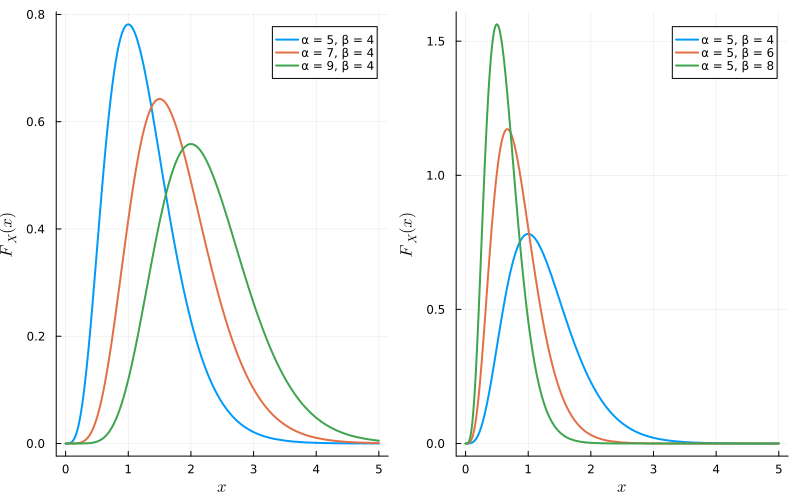

In [50]:
# varying the shape parameter
α_vals = [5, 7, 9]
β = 4
p1 = plot(xlabel = L"x", ylabel = L"F_X(x)")
for α in α_vals 
    plot!(x->pdf(Gamma(α, 1/β), x), 0, 5, lw = 2, label = "α = $α, β = $β")
end

# varying the rate parameter
α = 5
β_vals = [4, 6, 8]
p2 = plot(xlabel = L"x", ylabel = L"F_X(x)")
for β in β_vals 
    plot!(x->pdf(Gamma(α, 1/β), x), 0, 5, lw = 2, label = "α = $α, β = $β")
end

plot(p1, p2, size = (800, 500), layout = (1, 2) ) 

### Beta Distribution

<div style="text-align: justify;">


The Beta distribution is often used to model random variables that take values in the interval $[0,1]$. It is particularly useful for modeling probabilities, proportions, and rates in a variety of applications, including Bayesian statistics, genetics, and quality control.

 \begin{equation}
f(x \mid \alpha, \beta)
=
\frac{x^{\alpha - 1}(1 - x)^{\beta - 1}}{B(\alpha, \beta)},
\quad 0 \le x \le 1,\; \alpha > 0,\; \beta > 0 .
\tag{15}
\end{equation}


where $$B(\alpha, \beta) = \int_0^{1}t^{\alpha-1}(1-t)^{\beta-1}dt \tag{16}$$ is the Beta function, ensuring that the total area under the curve equals to 1, making it a valid probability distribution. 

**Example:** Suppose we are modeling the proportion of successful pollination events for a particular plant species in a given region. We assume that the proportion of successful pollinations follows a Beta distribution with shape parameters $\alpha = 2$ and $\beta = 5$. 

To work with the Beta distribution in $\texttt{Julia}$, we can use the following function (demonstrated for the above example):

</div>

the probability density at a specific value of proportion $x$, say $x = 0.4$:

In [51]:
using Distributions

In [52]:
pdf(Beta(2, 5), 0.4)

1.5552

The probability that the proportion is less than or equal to a 0.3:

In [53]:
cdf(Beta(2, 5), 0.3)

0.5798250000000003

The value of $x$ for which the cumulative probability is at least 0.8:

In [54]:
quantile(Beta(2, 5), 0.8)

0.422447524846272

To generate 10 random proportions of successful pollination events across multiple trials or regions:

In [55]:
rand(Beta(2, 5), 10)

10-element Vector{Float64}:
 0.055086248991197774
 0.5047937111567071
 0.21014268653115165
 0.18684994405382102
 0.22634635984153617
 0.2961036363611681
 0.39801474410046916
 0.4620646176899086
 0.17845899648173827
 0.4184636087755803

To plot the Beta distribution with shape parameters $\alpha = 2$ and $\beta = 5$, we can use:

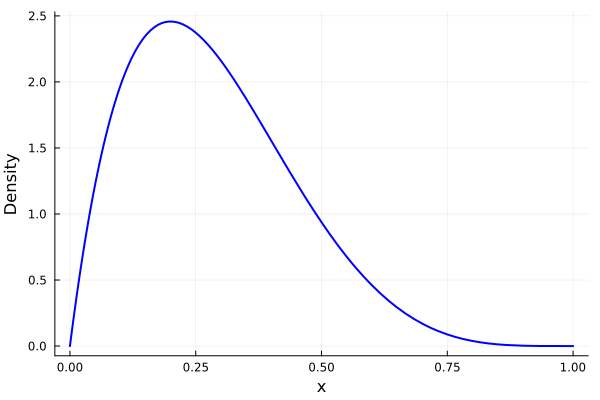

In [56]:
plot(x->pdf(Beta(2,5), x), 0, 1, color = "blue", lw = 2, 
    xlabel = "x",  ylabel = "Density", label = "")

## Bivariate Normal Distribution

<div style="text-align: justify;">

Let us assume $p = 2$-variate normal density in terms of individual parameters.

$$
\boldsymbol{\mu} = (\mu_1,\mu_2), \qquad
\Sigma =
\begin{pmatrix}
\sigma_{11} & \sigma_{12} \\
\sigma_{12} & \sigma_{22}
\end{pmatrix},
$$

where

$$
\sigma_{12} = \sqrt{\sigma_{11}}\sqrt{\sigma_{22}}\,\rho_{12}.
$$

Define

$$
\sigma_1^2 = \sigma_{11}, \qquad \sigma_2^2 = \sigma_{22}.
$$

 

Determinant of $\Sigma$

$$
|\Sigma|
= \sigma_{11}\sigma_{22}-\sigma_{12}^2
= \sigma_1^2\sigma_2^2(1-\rho_{12}^2).
$$

 
Quadratic Form

For $\mathbf{x}=(x_1,x_2)$,

$$
(\mathbf{x}-\boldsymbol{\mu})^\top \Sigma^{-1}(\mathbf{x}-\boldsymbol{\mu})
=
\frac{1}{1-\rho_{12}^2}
\left[
\frac{(x_1-\mu_1)^2}{\sigma_1^2}
-2\rho_{12}\frac{(x_1-\mu_1)(x_2-\mu_2)}{\sigma_1\sigma_2}
+\frac{(x_2-\mu_2)^2}{\sigma_2^2}
\right].
$$

 Density Function $f(x_1,x_2)$

$$
f(x_1,x_2)
=
\frac{1}{2\pi\sigma_1\sigma_2\sqrt{1-\rho_{12}^2}}
\exp\left\{
-\frac{1}{2(1-\rho_{12}^2)}
\left[
\frac{(x_1-\mu_1)^2}{\sigma_1^2}
-2\rho_{12}\frac{(x_1-\mu_1)(x_2-\mu_2)}{\sigma_1\sigma_2}
+\frac{(x_2-\mu_2)^2}{\sigma_2^2}
\right]
\right\}.
$$
 

PDF of the Bivariate Normal Distribution (General Form)

If $(X_1,X_2)\sim \mathcal N_2(\boldsymbol{\mu},\Sigma)$, then the joint probability density function is

$$
f(x_1,x_2)
=
\frac{1}{2\pi|\Sigma|^{1/2}}
\exp\left(
-\frac12
(\mathbf{x}-\boldsymbol{\mu})^\top
\Sigma^{-1}
(\mathbf{x}-\boldsymbol{\mu})
\right),
\quad \mathbf{x}=(x_1,x_2).
$$


</div>

In [57]:
using Plots, Statistics, LinearAlgebra
using LaTeXStrings, StatsBase
using Distributions

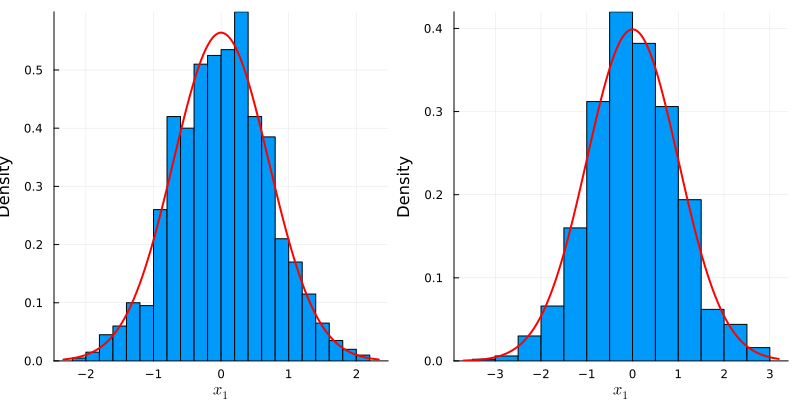

In [58]:
μ = [0, 0]
Σ = [0.5 0; 0 1]
n = 1000
x = rand(MvNormal(μ, Σ ), n)
p1 = histogram(x[1, :], normalize = true, xlabel = L"x_1", ylabel = "Density", 
    label = "")
plot!(x->pdf(Normal(μ[1], sqrt(Σ[1, 1])), x), color = "red", lw = 2, label = "")

p2 = histogram(x[2, :], normalize = true, xlabel = L"x_1", ylabel = "Density", 
    label = "")
plot!(x->pdf(Normal(μ[2], sqrt(Σ[2, 2])), x), color = "red", lw = 2, label = "")

plot(p1, p2, layout = (1, 2), size = (800, 400))

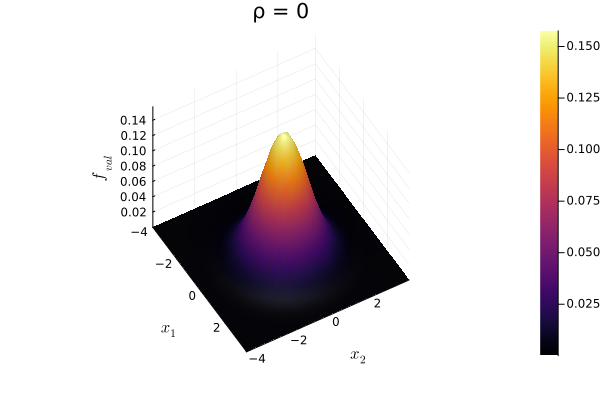

In [59]:
μ = [0, 0]
Σ = [1 0; 0 1]

function f(x)
    (1/(2*π*sqrt(det(Σ))))*exp(-(1/2)*transpose(x .-μ)*inv(Σ)*(x .-μ))
end

x1 = -4:0.3:4
x2 = -4:0.3:4

f_val = Matrix{Float64}(undef, length(x1), length(x2))

for i in 1:length(x1) 
    for j in 1:length(x2) 
        x = [x1[i], x2[j]]
        f_val[i, j] = f(x)
    end
end

surface(x1, x2, f_val, xlabel = L"x_1", ylabel = L"x_2", zlabel = L"{f_{val}}", 
         title = "ρ = 0", camera = (60, 50))


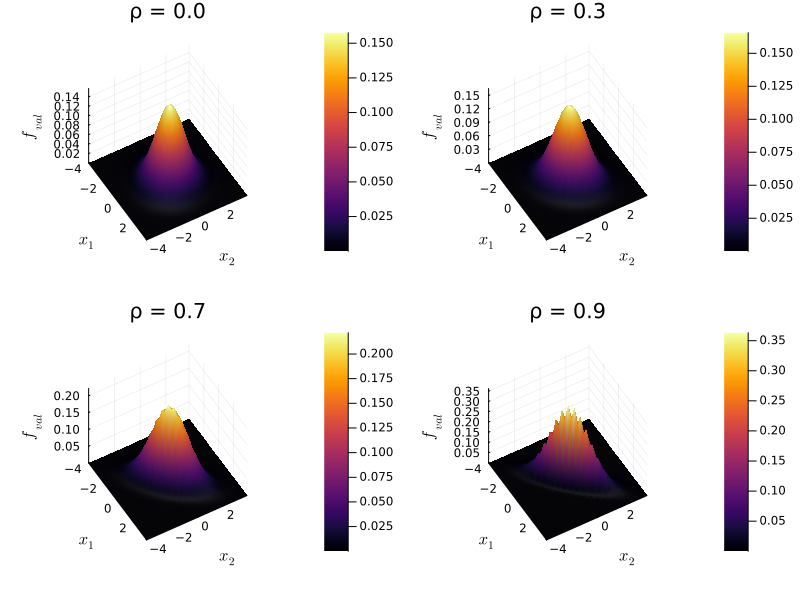

In [60]:
# Let us now plot some more figures with different ρ values
function f(x)
    (1/(2*π*sqrt(det(Σ))))*exp(-(1/2)*transpose(x .-μ)*inv(Σ)*(x .-μ))
end

μ = [0, 0]
ρ_vals = [0, 0.3, 0.7, 0.9]

plt = plot(layout = (2,2), size = (800, 600))
for (idx, ρ) in enumerate(ρ_vals)
    Σ = [1 ρ; ρ 1] 
    f_val = Matrix{Float64}(undef, length(x1), length(x2))
    for i in 1:length(x1) 
    for j in 1:length(x2) 
        x = [x1[i], x2[j]]
        f_val[i, j] = f(x)
    end
end
surface!(x1, x2, f_val, xlabel = L"x_1", ylabel = L"x_2", zlabel = L"{f_{val}}", 
    title = "ρ = $ρ",  camera = (60, 50), subplot = idx)
end
display(plt)

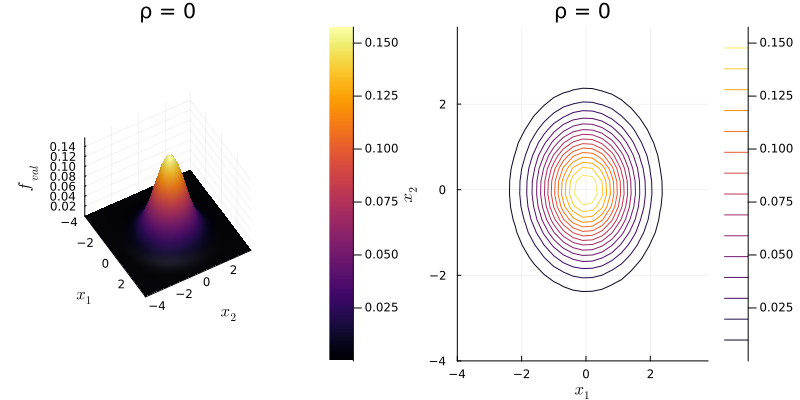

In [61]:
function f(x)
    (1/(2*π*sqrt(det(Σ))))*exp(-(1/2)*transpose(x .-μ)*inv(Σ)*(x .-μ))
end 

μ = [0.0, 0.0]
Σ = [1.0 0.0; 0.0 1.0]
x1 = -4:0.3:4
x2 = -4:0.3:4


f_val = Matrix{Float64}(undef, length(x1), length(x2))

for i in 1:length(x1)
    for j in 1:length(x2)
        x = [x1[i], x2[j]]
        f_val[i, j] = pdf(MvNormal(μ, Σ), x)
    end
end

p1 = surface(x1, x2, f_val, xlabel = L"x_1", ylabel = L"x_2", zlabel = L"{f_{val}}", 
         title = "ρ = 0", camera = (60, 50))

p2 = contour(x1, x2, f_val, xlabel = L"x_1", ylabel = L"x_2", zlabel = L"{f_{val}}", 
         title = "ρ = 0")
plot(p1, p2, layout = (1, 2), size = (800, 400))

# Simulation Based Analysis

<div style="text-align: justify;">


Probability distributions play a fundamental role in real-life data analysis problems. However, their importance is often underestimated in many applications, leading students to blindly accept the outcomes provided by software. Understanding probability distributions equips us with the ability to grasp the inherent uncertainty in natural processes. Data collected from the field are subject to various types of randomness, and probability theory provides a framework for these random phenomena. In this manual, we shall understand various probability distributions using `Julia` without getting into the mathematical intricacies of these distributions.


In Julia, `rand` from the **Base.jl** library is used to generate random samples from a specified distribution or range. The functions `pdf`, `cdf`, and `quantile` from the **Distributions.jl** package are used to compute the probability density or mass, cumulative probability, and quantile values, respectively. These functions provide a unified and consistent framework for working with probability distributions in Julia, allowing for analytical evaluation, random sampling, and probabilistic modeling within the same syntax.


We start our discussion with the coin tossing experiments. Suppose we want to simulate a coin tossing experiment using  `Julia` instead of performing that experiment physically. Suppose the probability of success is $p = 0.3$. If we toss the coin 100 times say, we should expect an approximately 30 many heads (intuition!). In the following, we do this experiment once and observe that how many heads have been obtained. Certainly, the assumption that such experiments can be identically performed an infinitely many numbers of times remain intact. As an applied researcher, we should just keep these statements as universally true.


</div>

In [62]:
using Distributions  # Required Package

In [63]:
p = 0.3  # probability of head
n = 100 # number of throws
x = rand(Bernoulli(p), n)
first(x, 6)

6-element Vector{Bool}:
 1
 0
 1
 1
 0
 0

In [64]:
sum(x)

23

<div style="text-align: justify;">

You are required to check whether the sum is actually 30 or not. If it appeared to be 30, do this experiment once again, you are likely to get another number, however, that is expected to be close to 30. As an ecologist, each run of the above code may be considered as follows: I visited a site consecutively 100 days and, on each day, we record 1 if we observe a phenomenon of our interest, otherwise record 0. Although, it is highly superficial to consider that conditions of all the 100 are identical, but somewhere, we need to start the discussion also to get into a more complicated statistical thinking.


In the above code, the quantity $x$ contains a possible realization of a **coin tossing experiment** (called a **Bernoulli trial**). Out of $100$ positions, each position can be filled in two ways (either $0$ or $1$). Therefore, there are a total of $2^{100}$ possible realizations of the coin tossing experiment. Similarly, in observations on the phenomenon of interest, out of these $2^{100}$ possibilities, we have obtained one particular sequence of $0$’s and $1$’s, which we call the **field observations**. The **Bernoulli($p$)** distribution acts as a probability model for the natural process from which we have collected the observations. Our interest is to obtain an accurate estimate of the unknown probability $p$ (with a certain confidence level).  

Statisticians often say to ecologists that if you provide more data, then they can give you better estimates. This is not magic — this simple coin-tossing experiment demonstrates this idea clearly. Suppose we toss the coin $n$ times and record the number of successes, then obtain the **proportion of success** as an estimate of $p$. We then increase the number $n$ and see whether the proportion of success becomes close to the true probability $0.3$ (the value used in the simulation). It is important to note that in real field experiments, we never know the true underlying probability $p$ the exact probability of observing the phenomenon. However, in a computer simulation, we know that the experiments have been performed by setting $p = 0.3$. Therefore, we can verify whether the proportion of success gets closer to the true value as the sample size increases. The following example demonstrates this fact.

</div>

In [65]:
using Distributions, Plots, LaTeXStrings
using Statistics

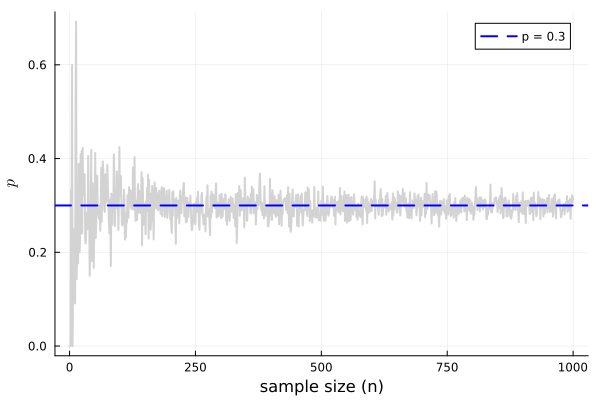

In [66]:
p = 0.3
n_vals = 1:1000
p_hat = zeros(length(n_vals))

for n in n_vals 
    x = rand(Bernoulli(p), n)
    p_hat[n] = sum(x)/n
end

plot(n_vals, p_hat, color = "lightgrey", xlabel = "sample size (n)", 
    ylabel = L"p", lw = 2, label = "")
hline!([p], color = "blue", lw = 2, ls = :dash, label = "p = $p" )

Figure 1: You will see the similar picture in your computer for the coin tossing experiment. It is visible that as the sampling size increases, the sample proportion of success are closer to the true probability $0.3$.

# Simple Linear Regression

<div style="text-align: justify;">

Suppose we aim to predict the **Volume** of the timber using the tree diameter.  Therefore, we consider the following statistical model:

$$
\text{Volume} = \beta_0 + \beta_1 \times \text{Girth} + \epsilon.
$$

In the above expression, **Volume** is the response variable and **Girth** is the predictor variable.  $\beta_0$ and $\beta_1$ are the intercept and slope parameters of the population regression line, respectively.  The $\epsilon$ represents the random component that cannot be explained through the linear relationship between the response and predictor.  We also assume that $\epsilon \sim \mathcal{N}(0, \sigma^2)$.  

In the above equation, **Girth** is fixed and **ε** is random, which makes **Volume** a random quantity and follows a normal distribution with mean  
$\beta_0 + \beta_1 \times \text{Girth}$ and variance $\sigma^2$.

It is very important to note that the assumption of such relationships at the population level is mostly driven by the visualization and existing knowledge about the underlying process.  In this case, from the scatterplot, we have hypothesized that a linear relationship between the **Volume** and the **Girth** may be a reasonable assumption to consider.  In principle, the true nature of the relationship is always unknown. With our scientific instruments, we can probably identify a most likely relationship from a set of reasonable hypotheses.  However, in this case, our visualization is quite clear, and we go ahead with the assumption of linear relationships.

 
Our goal is to estimate the parameters $\beta_0$, $\beta_1$, and $\sigma^2$. There are 31 observations, and we write down the data model as:

$$
\text{Volume}_i = \beta_0 + \beta_1 \times \text{Girth}_i + \epsilon_i, \quad i \in \{1, 2, \ldots, n\}.
$$

We seek to obtain the estimate of $\beta_0$ and $\beta_1$ that minimizes the error sum of squares:

$$
\sum_{i=1}^{31} (\text{Volume}_i - \beta_0 - \beta_1 \times \text{Girth}_i)^2.
$$

The most important part of the output is to understand the interpretation of the **p-value**, which is represented as `Pr(>|t|)`.  The fitting exercise also performs the testing of two hypotheses:

$$
H_0 : \beta_0 = 0 \quad \text{versus} \quad H_1 : \beta_0 \neq 0
$$

$$
H_0 : \beta_1 = 0 \quad \text{versus} \quad H_1 : \beta_1 \neq 0
$$

If we reject the null hypothesis $H_0 : \beta_1 = 0$ (at a certain level of significance, say 5%),   that means the tree diameter (**Girth**) has a good contribution in predicting the **Volume** of timber. A multiple **R-squared** value of 0.9353 indicates that approximately **94%** of the variation in **Volume** can be explained by the tree diameter through a linear function. In this case, this is quite satisfactory.

</div>

In [67]:
using Plots, Statistics, StatsBase
using LaTeXStrings, StatsModels, StatsPlots
using RDatasets, DataFrames, RDatasets, LinearAlgebra
using GLM

In [68]:
data = dataset("datasets", "trees")
first(data, 6) # first 6 observations

Row,Girth,Height,Volume
,Float64,Int64,Float64
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8
6,10.8,83,19.7


## Matrix Notation

<div style="text-align: justify;">


We adopt some matrix notation for computation.

- The response variable is  
  $$
  Y = (y_1, y_2, \ldots, y_n)^\top .
  $$
  Therefore, $Y_{n \times 1}$ is a column vector and $n$ is the number of rows in the data.

- The design matrix is $X$. In this case, we have the predictor variable  
  $$
  x = (x_1, x_2, \ldots, x_n)^\top ,
  $$
  which is a column vector. If the linear equation contains an intercept term $\beta_0$, we consider the design matrix as
  $$
  X =
  \begin{pmatrix}
  1 & x_1 \\
  1 & x_2 \\
  \vdots & \vdots \\
  1 & x_n
  \end{pmatrix}.
  $$

- The parameter vector is  
  $$
  \beta = (\beta_0, \beta_1)^\top,
  $$
  which is a 2-dimensional column vector.

  The linear model can now be represented as
$$
Y = X\beta .
$$

To find the best choice of $\beta$, we need to minimize the error sum of squares with respect to $\beta$. In matrix notation, the error sum of squares is given by
$$
\mathrm{ESS}(\beta) = (Y - X\beta)^\top (Y - X\beta).
$$

We compute $\dfrac{\partial}{\partial \beta}\,\mathrm{ESS}(\beta)$ and equate it to zero, which gives the system of linear equations (in matrix form)
$$
X^\top Y = (X^\top X)\beta .
$$

If $\det(X^\top X) \neq 0$, then the least squares estimate of $\beta$ is obtained as
$$
\hat{\beta} = (X^\top X)^{-1} X^\top Y .
$$

</div>

In [69]:
Y = data.Volume
x = data.Girth
X = hcat(fill(1, length(Y)), x)   # design matrix

31×2 Matrix{Float64}:
 1.0   8.3
 1.0   8.6
 1.0   8.8
 1.0  10.5
 1.0  10.7
 1.0  10.8
 1.0  11.0
 1.0  11.0
 1.0  11.1
 1.0  11.2
 1.0  11.3
 1.0  11.4
 1.0  11.4
 ⋮    
 1.0  13.8
 1.0  14.0
 1.0  14.2
 1.0  14.5
 1.0  16.0
 1.0  16.3
 1.0  17.3
 1.0  17.5
 1.0  17.9
 1.0  18.0
 1.0  18.0
 1.0  20.6

In [70]:
beta_hat = inv(X'*X) * X' * Y

2-element Vector{Float64}:
 -36.943459124578794
   5.06585642284378

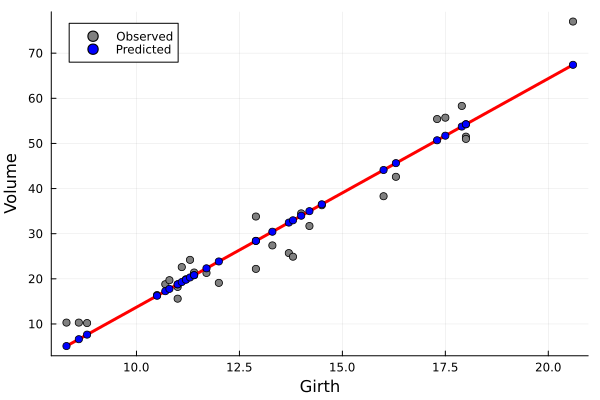

In [71]:
scatter(x, Y, color = "grey", xlabel = "Girth", ylabel = "Volume", 
    label = "Observed")
plot!(x->beta_hat[1] .+ beta_hat[2]*x, color = "red", lw = 3, 
    label = "")
Y_predicted = X*beta_hat
scatter!(x, Y_predicted, color = "blue", label = "Predicted")

## Using Package

In [72]:
lm_fit = lm(@formula(Volume~Girth), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Volume ~ 1 + Girth

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  -36.9435     3.36514   -10.98    <1e-11  -43.826     -30.061
Girth          5.06586    0.247377   20.48    <1e-18    4.55991     5.5718
──────────────────────────────────────────────────────────────────────────

In [73]:
r2(lm_fit)   # R-squared value

0.93531987245517

In [74]:
adjr2(lm_fit)   # adjusted R-squared value

0.9330895232294862

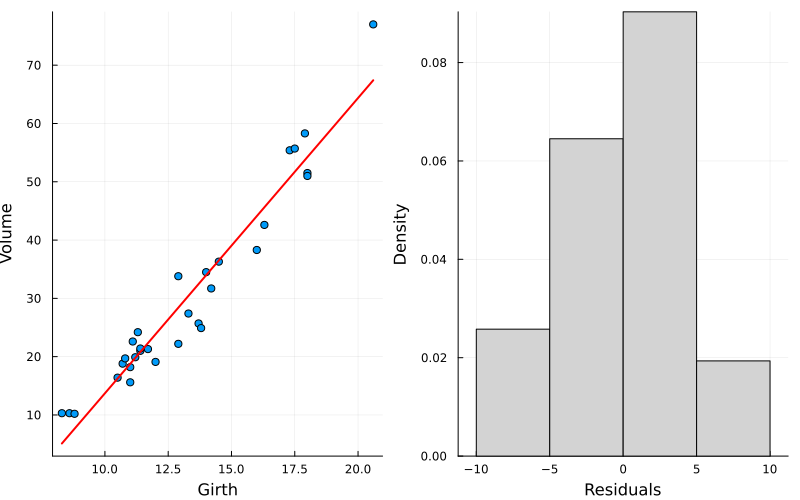

In [75]:
predicted_vals = GLM.predict(lm_fit)
p1 = Plots.scatter(data.Girth, data.Volume, xlabel = "Girth", 
    ylabel = "Volume", label = "")
Plots.plot!(data.Girth, predicted_vals, color = "red", 
    lw = 2, label = "")

resid = residuals(lm_fit)
p2 = Plots.histogram(resid, normalize = true, color = "lightgrey",
    xlabel = "Residuals", ylabel = "Density", label = "")

Plots.plot(p1, p2, layout = (1, 2), size = (800, 500))

Figure:  The fitting of the linear regression and the distribution of errors are shown using histograms. The blue dots indicate the actual observations, and the red line is the fitted line.

# Hypothesis Testing

A hypothesis test produces a number between 0 and 1 that measures the degree of  certainty we may have in the truth of a hypothesis about a quantity such as a population  mean or proportion. It turns out that hypothesis tests are closely related to confidence  intervals. In general, whenever a confidence interval can be computed, a hypothesis test can also be performed, and vice versa. The null hypothesis, denoted by $H_0$, is the hypothesis that is to be tested. The alternative hypothesis, denoted by $H_1$ is the hypothesis that in some sense contradicts the null 
hypothesis 
- **Type I error**: The probability of a type I error is the probability of rejecting the null hypothesis when 𝐻0 is true 
- **Type II error**: The probability of a type II error is the probability of accepting the null  hypothesis when 𝐻1 is true. This probability is a function of µ as well as other factor

## One Sample t test

<div style="text-align: justify;">

- The t tests are based on the assumption that data come from the normal distribution. In the one-sample case, we have data $(x_1, \ldots, x_n)$ assumed to be independent realizations of random variables with distribution which is normal

- Normal distribution with mean $\mu$ and variance $\sigma^2$, and we wish to test the null hypothesis that $\mu = \mu_0$. We can estimate the parameters $\mu$ and $\sigma$ by the empirical mean and standard deviation

The formula for the one-sample t-test is given by:

$$
t = \frac{\bar{x} - \mu_0}{s/\sqrt{n}}
$$

Inference:

- **Null Hypothesis $(H_0)$:** $\mu = \mu_0$

- **Alternative Hypothesis $(H_1)$:** $\mu \neq \mu_0$ (for a two-tailed test)

We calculate the t-statistic using the formula above, and compare it with the critical value from the t-distribution with $n - 1$ degrees of freedom.

- If the **p-value $\le \alpha$**, we reject the null hypothesis and conclude that there is a statistically significant difference between the sample mean and the hypothesized mean.

- If the **p-value $\ge \alpha$**, we fail to reject the null hypothesis, suggesting there is not enough evidence to say the sample mean differs from $\mu_0$.

Where:

- $\bar{x}$ is the sample mean

- $\mu_0$ is the population mean under the null hypothesis

- $s$ is the sample standard deviation

- $n$ is the sample size

</div>

let take example of concerning daily energy intake in KJ for 11 women. First place in data vector

In [76]:
using Statistics, HypothesisTests

In [77]:
daily_intake = [5260,5470,5640,6180,6390,6515,6805,7515,7515,8230,8770]

11-element Vector{Int64}:
 5260
 5470
 5640
 6180
 6390
 6515
 6805
 7515
 7515
 8230
 8770

In [78]:
mean(daily_intake)

6753.636363636364

In [79]:
std(daily_intake)   # # standard deviation of daily intake

1142.1232221373727

<div style="text-align: justify;">

To investigate whether the women’s energy intake deviates systematically from a recommended value of $7725$  $\text{kJ}$. Assuming that data come from a normal distribution, the object is to test whether this distribution might have mean $\mu_0 = 7725$. This is done with t.test as follows:

</div>

In [80]:
μ₀ = 7725
OneSampleTTest(daily_intake, μ₀)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         7725
    point estimate:          6753.64
    95% confidence interval: (5986.0, 7521.0)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0181

Details:
    number of observations:   11
    t-statistic:              -2.8207540608310198
    degrees of freedom:       10
    empirical standard error: 344.3631083801271


## Two-sample t-test 

<div style="text-align: justify;">


The **two-sample t-test** is used to compare the means of two independent groups.

Formula:

For equal variances (pooled t-test):

$$
t = \frac{\bar{x}_1 - \bar{x}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
$$

Where:

- $\bar{x}_1, \bar{x}_2$ are the sample means

- $n_1, n_2$ are the sample sizes

- $s_p$ is the pooled standard deviation:

$$
s_p = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}}
$$

Hypotheses:

- **Null Hypothesis $(H_0)$:** $\mu_1 = \mu_2$

- **Alternative Hypothesis $(H_1)$:** $\mu_1 \ne \mu_2$ (two-tailed test)

Inference:

- Calculate the t-statistic and compare it against the critical value from the t-distribution with $n_1 + n_2 - 2$ degrees of freedom (for pooled variance case).

- Alternatively, compute the p-value:
    - If $p$-value $\le \alpha$, reject $H_0$ → there is a significant difference between the two means.
    - If $p$-value $\ge \alpha$, fail to reject $H_0$ → no significant difference between the means.

Note: If the variances are not assumed equal, use **Welch’s t-test**, which does not pool the variances and adjusts the degrees of freedom.

</div>


In [81]:
using Statistics
using HypothesisTests
using Random

# Example data: two independent samples
x1 = [12.1, 11.8, 12.5, 13.0, 12.3, 11.9]
x2 = [10.5, 10.8, 11.0, 10.6, 10.9, 10.7]

# Sample means
mean_x1 = mean(x1)
mean_x2 = mean(x2)

println("Mean of group 1 = ", mean_x1)
println("Mean of group 2 = ", mean_x2)

# Two-sample t-test (equal variances = pooled t-test)
test = EqualVarianceTTest(x1, x2)



Mean of group 1 = 12.266666666666667
Mean of group 2 = 10.75


Two sample t-test (equal variance)
----------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          1.51667
    95% confidence interval: (1.081, 1.953)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-04

Details:
    number of observations:   [6,6]
    t-statistic:              7.752053897041843
    degrees of freedom:       10
    empirical standard error: 0.19564707454438912


In [82]:
# Extract p-value
pval = pvalue(test)
println("p-value = ", pval)

# Decision at alpha = 0.05
α = 0.05
if pval ≤ α
    println("Reject H₀: significant difference 
            between means.")
else
    println("Fail to reject H₀: no significant 
           difference between means.")
end



p-value = 1.549719377440173e-5
Reject H₀: significant difference 
            between means.
